## Predicting software engineers salaries

@ TODO

With the use of regression and classification with natural language processing to find any significant patterns





In [1]:
#import libraries
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset 

In [2]:
#load the data into a Pandas dataframe
jobs=pd.read_csv('data.csv')
#display the first 3 rows on train_features
print(jobs.info())
jobs.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             495 non-null    object 
 1   Company           493 non-null    object 
 2   Links             500 non-null    object 
 3   Ratings           310 non-null    float64
 4   Address           494 non-null    object 
 5   Salary            103 non-null    object 
 6   Job description   494 non-null    object 
 7   full-description  500 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB
None


,Title,Company,Links,Ratings,Address,Salary,Job description,full-description
0,Software Engineer Degree Apprentice,Blue Engineering,https://uk.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN,London N1 6NU,"£16,000 a year",We are seeking a full-time software engineer a...,Software Engineer Degree Apprentice\nSalary: £...
1,Software Engineering Apprenticeship Registrati...,MI5,https://uk.indeed.com/rc/clk?jk=23e818204b884a...,NaN,London,NaN,On this Software Engineering Apprenticeship Yo...,On this Software Engineering Apprenticeship\n\...
2,Software Engineer Apprentice,Lloyds Banking Group,https://uk.indeed.com/rc/clk?jk=52b45930987414...,3.8,Bristol,"£27,540 - £32,130 a year",Build simple data models and software designs....,"Please note, this site is only for external ca..."


In our dataset there are 7 object features and 1 float feature. And later one we will create an integer column for average salary. The features Links will be used to fetch the full job description using Selenium. We will be looking at some dataset we collected from Glassdoors to calculate the distance from the capital and see if there is a correlation between that and salary. 

@Todo

## Predicting how much of a significace job experience has on salary @TODO
There were many unique types of job titles. While scraping for Software Engineer jobs in the United Kingdom, the most common one was Software Engineer which had a frequency of . We scraped ... jobs. The most obvious roles that suggested level of experience were 'Junior', 'Graduate', 'Senior'. As well, I was wanted to include 'Frontend', and 'Backend' engineers as to see whether expertise in a more specific job role would indicate a higher salary.  

# Preparing salary data


Salary data that we had explored was presented in a variety of formats, ie; most commonly annual salary, monthly, daily and hourly wage.

_After reviewing the various data and despite coming up with a method to successfully convert salary data to a single format, we decided to simply filter out data not in the annual salary format. This could be easily adjusted and changed in a future version of the process.
This should be kept in mind as the dataset and thus the resulting training will be different than if sample data had the other formats included._

- Removed duplicate rows.
- Removed rows with any elements null/missing

We then convert the string salary values to numerical format and in the case of a range (indicated by a present '-' character in the string) we also calculate the average from the range to pass on.

In [3]:
import re
import csv 


# with open ('data.csv') as jobs:
#     lst = list(csv.DictReader(jobs))
# # lst[:4]

testing_set = jobs[jobs['Salary'].isnull()]

def string_to_salary(x):
    #check if the salary is already correctly formatted
    if type(x) == int:
        return x
        
    # check for range and 
    if '-' in str(x):
        # remove currency symbols and commas from string 
        x = re.sub(r"[$£,]", '', x)
        #find only the numbers
        ns = re.findall('[\d,]+', x)
        ns_sum = 0
        for n in ns:
            #sum the salary range values
            ns_sum += int(n)
        #return average of salary range
        return (ns_sum/len(ns))
    else:
        # same as before case, remove unnecessary symbols and get numerical value
        x = re.sub(r"[$£,]", '', x)
        n = re.findall('[\d,]+', x)
        return float(n[0])


# drop rows with missing elements
jobs.dropna(inplace=True)
jobs.drop_duplicates()
# print(jobs['Salary'])
    
jobs = jobs[jobs.Salary.str.contains("year") == True]

#print(jobs['Salary'])
    
jobs['real_salary'] = jobs['Salary'].map(string_to_salary)

#(DATAFRAME COMPARE)
df_compare = pd.DataFrame({'Actual':jobs['Salary'], 'Average': jobs['real_salary']})
print(df_compare.head(10))

                       Actual   Average
2    £27,540 - £32,130 a year   29835.0
8              £31,850 a year   31850.0
14             £21,500 a year   21500.0
18   £35,000 - £70,000 a year   52500.0
44  £90,000 - £116,000 a year  103000.0
57   £39,309 - £48,226 a year   43767.5
70   £57,495 - £83,214 a year   70354.5
85   £40,057 - £45,839 a year   42948.0
92   £57,861 - £75,710 a year   66785.5
99   £68,139 - £75,710 a year   71924.5


## Salary by title 

@TODO

In [4]:
jobs.groupby(['Title'])['real_salary'].mean().sort_values()

Title
Apprentice Developer                                                19801.00
2022 UK L6 Software Engineering Degree Apprenticeship - Newb...     21500.00
Software Engineering - Internship                                   21500.00
Graduate Software Engineer (Immediate Start)                        28000.00
IT Graduate - Software Engineer, IT                                 29254.00
Software Engineer Apprentice                                        29835.00
Graduate Software Engineer                                          30000.00
Graduate Software Tester                                            30000.00
Junior Software Engineer C++                                        31500.00
Software Engineering - Graduate Programme                           31850.00
Web Developer                                                       37368.75
Junior .NET Developer                                               38380.00
Software Quality Engineer                                           40

## Data Analysis

In order to understand our data we wanted to add a visual representation of its features and look for any correlation.

**Summarizing feature variables**

In [5]:
import seaborn as sns

#Function to find the median and plot it on the graph
def show_median(df,col):
  sns.set_theme(style="whitegrid")
  plt.figure(figsize=(20,15))
  plt.subplot(3,1,1)
  my_order = df.groupby(by=[col])['real_salary'].median().sort_values(ascending=True).index
  plt.xticks(rotation=45,ha='right')
  sns.boxplot(x=col, y="real_salary", data=df, order=my_order)

  plt.show()

#Function to find the mean and plot it on the graph
def show_mean(df,col):
  plt.figure(figsize=(20,15))
  plt.subplot(3,1,2)
  mean=df.groupby(by=[col])['real_salary'].mean().sort_values().plot()
  plt.xlabel(col)
  plt.ylabel('mean real_salary')

  plt.show()

#Function to count column values and plot it on the graph
def show_count(df,col):
  plt.figure(figsize=(20,15))
  plt.subplot(3,1,3)
  df[col].value_counts().sort_values().plot() 
  plt.xlabel(col)
  plt.ylabel('count')

  plt.show()

See what is the range of salary based on the Company 

*Showing the mean salary per Company*

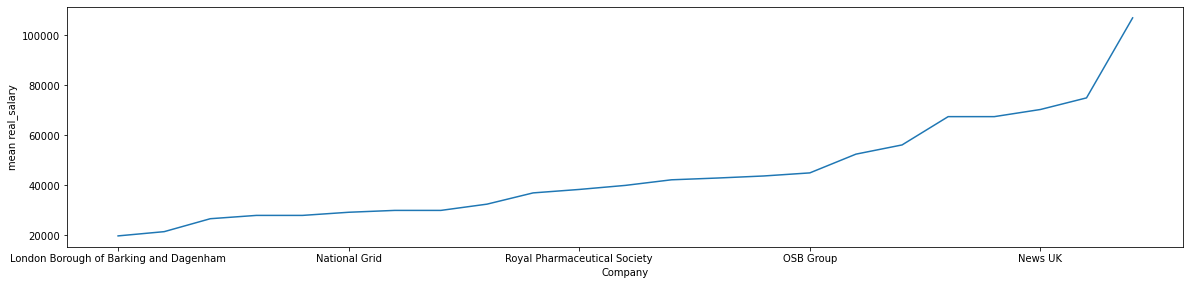

In [6]:
show_mean(jobs, 'Company')

*Showing the median salary per Comapany as a range*



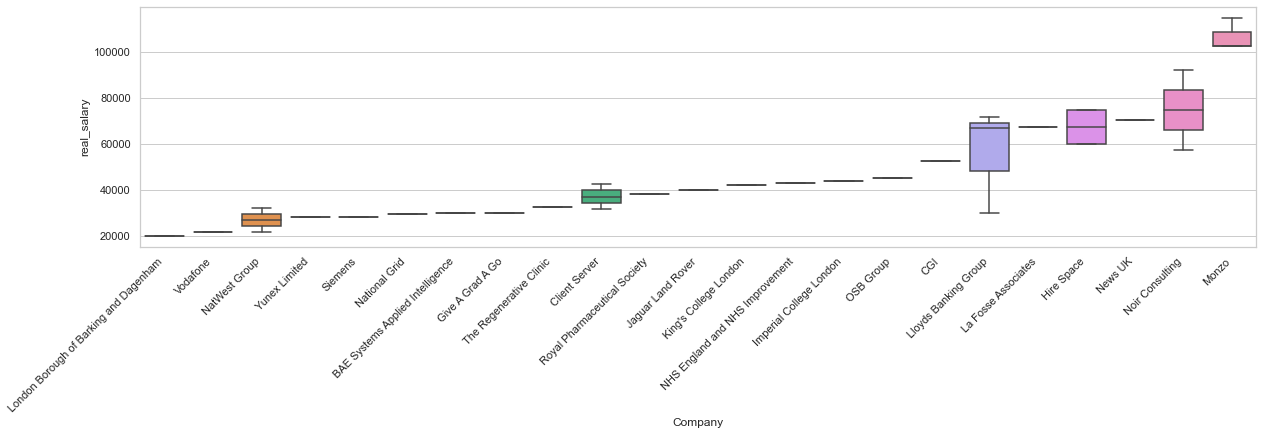

In [7]:
show_median(jobs, 'Company')

See what is the range of salary based on the Job Title

*Showing the mean salary per job Title*

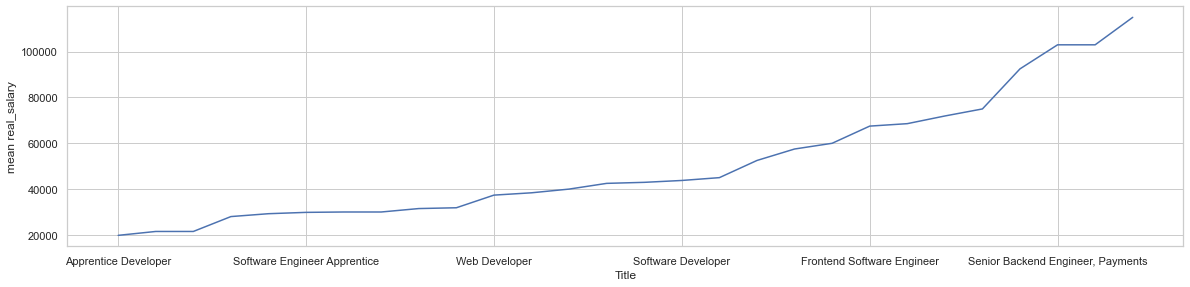

In [8]:
show_mean(jobs, 'Title')


*Showing the median salary per job Title*

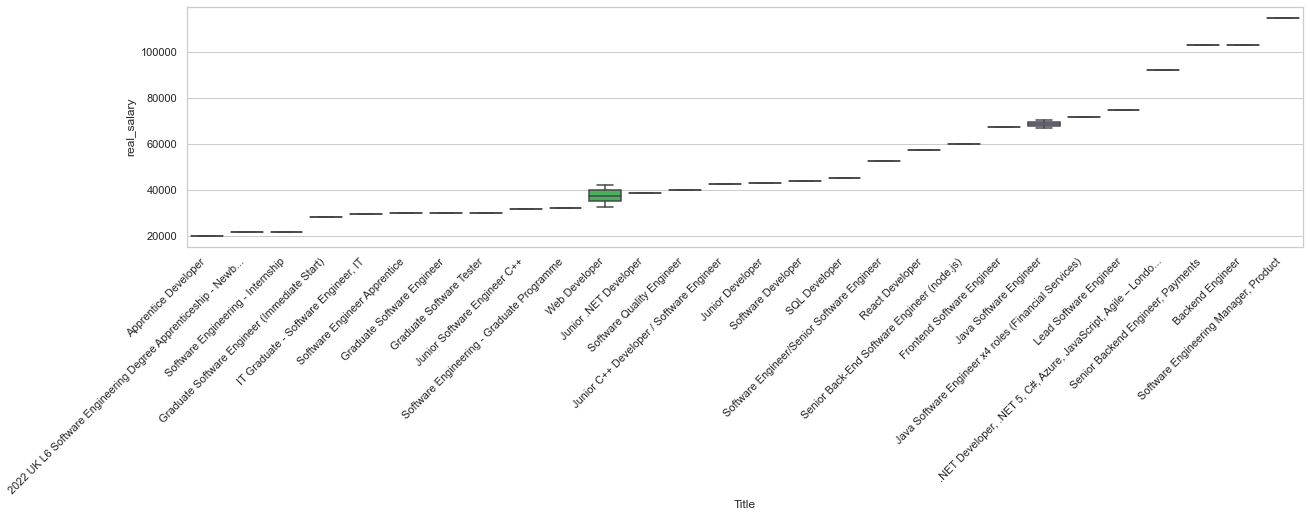

In [9]:
show_median(jobs, 'Title')

*Showing the median salary per job Title*

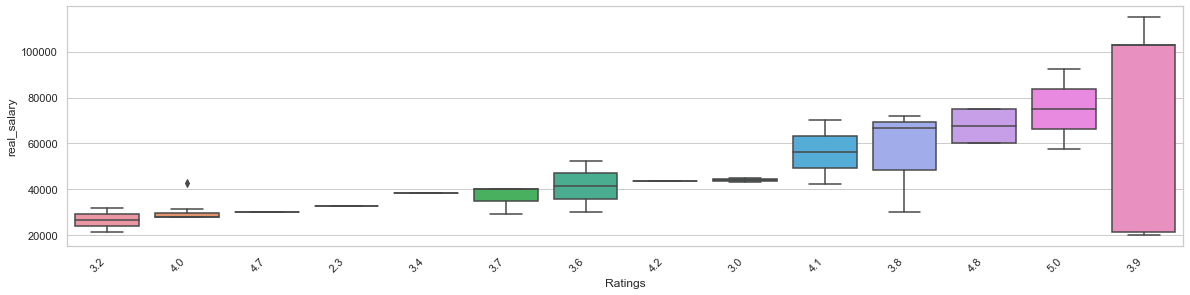

In [10]:
show_median(jobs, 'Ratings')

See correlation between Ratings and Salaries

In [11]:
print("Correlation between Salary and Ratings", jobs['real_salary'].corr(jobs['Ratings']))
jobs.corr()

Correlation between Salary and Ratings 0.3592678555685786


,Ratings,real_salary
Ratings,1.000000,0.359268
real_salary,0.359268,1.000000


## Summarize the target variable

Since our target variable is salary we want to see the density of our data and the range of salaries that we have

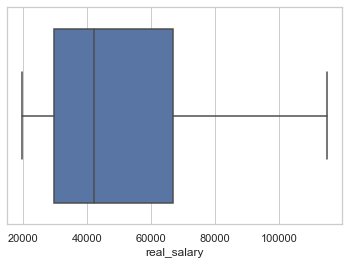

In [12]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=jobs["real_salary"])


Plot distribution graph with the mean and a median values

## Using python geopy to be installed for distance calculation. @

Glassdoor has an api available and we found their address field to be useful to see the correlation between address...
Indeed did not have one so we had to scrape it with Selenium... 

@Talk about the results a bit here and mostly on report. 

 

## Word vectorisation @krystian-city

## TFLearn training and testing labels

##  Network

## Model evaluation